In [9]:
import math
import folderstats
from bokeh.io import output_file, show
from bokeh.models import (BoxSelectTool, Circle, EdgesAndLinkedNodes, HoverTool,
                          MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool,)
from bokeh.palettes import Spectral4
from bokeh.plotting import from_networkx

In [10]:
df = folderstats.folderstats('/media/subhaditya/DATA/Github/PaperImplementations/', ignore_hidden=True)

In [11]:
df

,id,path,name,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid
0,3,/media/subhaditya/DATA/Github/PaperImplementat...,1803.09820,pdf,3513595,2020-04-16 10:11:49,2020-04-16 10:11:49,2020-04-16 10:11:49,False,NaN,1,2,1000
1,4,/media/subhaditya/DATA/Github/PaperImplementat...,fig1,png,80414,2020-04-16 11:33:24,2020-04-16 10:13:12,2020-04-16 11:33:24,False,NaN,1,2,1000
2,5,/media/subhaditya/DATA/Github/PaperImplementat...,README,md,2922,2020-04-16 11:40:12,2020-04-16 11:40:12,2020-04-16 11:40:12,False,NaN,1,2,1000
3,2,/media/subhaditya/DATA/Github/PaperImplementat...,NN hyper-parameters disciplined approach,None,3596931,2020-04-16 11:33:24,2020-04-16 11:33:24,2020-04-16 11:33:24,True,3.0,1,1,1000
4,7,/media/subhaditya/DATA/Github/PaperImplementat...,alex,ipynb,1497399,2020-04-23 15:44:43,2020-04-22 13:00:42,2020-04-22 13:00:42,False,NaN,1,6,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,168,/media/subhaditya/DATA/Github/PaperImplementat...,README,md,1321,2020-04-16 02:25:35,2020-04-16 02:25:35,2020-04-16 02:25:35,False,NaN,1,161,1000
166,169,/media/subhaditya/DATA/Github/PaperImplementat...,WGAN,ipynb,9723985,2020-04-18 20:46:03,2020-04-16 16:20:37,2020-04-16 16:20:37,False,NaN,1,161,1000
167,170,/media/subhaditya/DATA/Github/PaperImplementat...,wwdis,png,5251,2020-04-18 15:26:36,2020-04-16 01:38:04,2020-04-16 01:38:13,False,NaN,1,161,1000
168,161,/media/subhaditya/DATA/Github/PaperImplementat...,WGAN,None,19371168,2020-04-16 17:10:56,2020-04-16 16:20:38,2020-04-16 16:20:38,True,9.0,1,1,1000


In [12]:
df.iloc[12].path.split("/")[-1]

'bagOfTricks'

In [13]:
def ret_name(x): return str(x).split("/")[-1]

In [14]:
df[df["folder"]==True]["path"].apply(ret_name)

3      NN hyper-parameters disciplined approach
9                                       AlexNet
12                                  bagOfTricks
15               batchnormAndOnlybatchnorm(WIP)
19                              CapsuleNet(WIP)
22                              Class Imbalance
27                                        DCGan
31                                    DeepDream
35                       DeepLab (Semantic seg)
38                                      Dropout
40                            EfficientNet(WIP)
46                                   Focal Loss
54                                    GoogLeNet
58                                       models
60                                         LSTM
62                                          KKT
63                                   MATHBEHIND
65                                    mish(WIP)
69                                    MobileNet
74                           Neural Fabric(WIP)
77                                     O

In [15]:
df.loc[list(np.where(df["folder"]==True)[0]),"name"] = df[df["folder"]==True]["path"].apply(ret_name).values

In [16]:
df

,id,path,name,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid
0,3,/media/subhaditya/DATA/Github/PaperImplementat...,1803.09820,pdf,3513595,2020-04-16 10:11:49,2020-04-16 10:11:49,2020-04-16 10:11:49,False,NaN,1,2,1000
1,4,/media/subhaditya/DATA/Github/PaperImplementat...,fig1,png,80414,2020-04-16 11:33:24,2020-04-16 10:13:12,2020-04-16 11:33:24,False,NaN,1,2,1000
2,5,/media/subhaditya/DATA/Github/PaperImplementat...,README,md,2922,2020-04-16 11:40:12,2020-04-16 11:40:12,2020-04-16 11:40:12,False,NaN,1,2,1000
3,2,/media/subhaditya/DATA/Github/PaperImplementat...,NN hyper-parameters disciplined approach,None,3596931,2020-04-16 11:33:24,2020-04-16 11:33:24,2020-04-16 11:33:24,True,3.0,1,1,1000
4,7,/media/subhaditya/DATA/Github/PaperImplementat...,alex,ipynb,1497399,2020-04-23 15:44:43,2020-04-22 13:00:42,2020-04-22 13:00:42,False,NaN,1,6,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,168,/media/subhaditya/DATA/Github/PaperImplementat...,README,md,1321,2020-04-16 02:25:35,2020-04-16 02:25:35,2020-04-16 02:25:35,False,NaN,1,161,1000
166,169,/media/subhaditya/DATA/Github/PaperImplementat...,WGAN,ipynb,9723985,2020-04-18 20:46:03,2020-04-16 16:20:37,2020-04-16 16:20:37,False,NaN,1,161,1000
167,170,/media/subhaditya/DATA/Github/PaperImplementat...,wwdis,png,5251,2020-04-18 15:26:36,2020-04-16 01:38:04,2020-04-16 01:38:13,False,NaN,1,161,1000
168,161,/media/subhaditya/DATA/Github/PaperImplementat...,WGAN,None,19371168,2020-04-16 17:10:56,2020-04-16 16:20:38,2020-04-16 16:20:38,True,9.0,1,1,1000


In [17]:
df.loc[np.where(df["folder"]==True)[0]]

,id,path,name,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid
3,2,/media/subhaditya/DATA/Github/PaperImplementat...,NN hyper-parameters disciplined approach,None,3596931,2020-04-16 11:33:24,2020-04-16 11:33:24,2020-04-16 11:33:24,True,3.0,1,1,1000
9,6,/media/subhaditya/DATA/Github/PaperImplementat...,AlexNet,None,3003739,2020-04-22 11:54:43,2020-04-22 11:54:43,2020-04-22 11:54:43,True,5.0,1,1,1000
12,12,/media/subhaditya/DATA/Github/PaperImplementat...,bagOfTricks,None,568717,2020-05-25 22:19:45,2020-05-21 19:34:33,2020-05-21 19:34:33,True,2.0,1,1,1000
15,15,/media/subhaditya/DATA/Github/PaperImplementat...,batchnormAndOnlybatchnorm(WIP),None,815548,2020-05-18 10:33:44,2020-05-12 23:53:58,2020-05-12 23:54:09,True,2.0,1,1,1000
19,18,/media/subhaditya/DATA/Github/PaperImplementat...,CapsuleNet(WIP),None,129645,2020-05-01 22:10:02,2020-05-01 22:10:02,2020-05-01 22:10:02,True,3.0,1,1,1000
22,22,/media/subhaditya/DATA/Github/PaperImplementat...,Class Imbalance,None,3368116,2020-04-16 14:56:16,2020-04-16 14:56:15,2020-04-16 14:56:15,True,2.0,1,1,1000
27,25,/media/subhaditya/DATA/Github/PaperImplementat...,DCGan,None,8768028,2020-04-16 14:39:45,2020-04-16 14:39:44,2020-04-16 14:39:44,True,4.0,1,1,1000
31,30,/media/subhaditya/DATA/Github/PaperImplementat...,DeepDream,None,3036363,2020-04-05 11:34:45,2020-04-05 11:34:44,2020-04-05 11:34:44,True,3.0,1,1,1000
35,34,/media/subhaditya/DATA/Github/PaperImplementat...,DeepLab (Semantic seg),None,7327930,2020-04-21 19:12:35,2020-04-21 19:12:35,2020-04-21 19:12:35,True,3.0,1,1,1000
38,38,/media/subhaditya/DATA/Github/PaperImplementat...,Dropout,None,2880667,2020-04-02 01:15:19,2020-04-02 01:15:19,2020-04-02 01:15:19,True,2.0,1,1,1000


In [18]:
# df["name"] = df["name"].str.slice(stop = crop)+"."+df["extension"]

In [19]:
df.shape

(170, 13)

In [20]:
import matplotlib.pyplot as plt

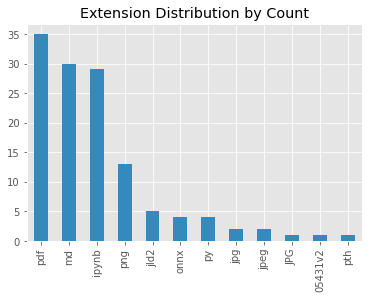

In [21]:
with plt.style.context('ggplot'):
    df['extension'].value_counts().plot(
        kind='bar', color='C1', title='Extension Distribution by Count');

In [22]:
import networkx as nx

In [23]:
# Sort the index
df_sorted = df.sort_values(by='id')

G = nx.Graph()
for i, row in df_sorted.iterrows():
    if row.parent:
        G.add_edge(row.id, row.parent)
    
# Print some additional information
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 170
Number of edges: 169
Average degree:   1.9882


In [24]:
H = nx.relabel_nodes(G, dict(zip(df_sorted["id"],df_sorted["name"])))

In [25]:
import math

In [26]:
from bokeh.io import output_file, show
from bokeh.models import (BoxSelectTool, Circle, EdgesAndLinkedNodes, HoverTool,
                          MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool,)
from bokeh.palettes import Spectral4
from bokeh.plotting import from_networkx

In [27]:
dict(zip(df_sorted["id"].astype('str'),df_sorted["name"]))

{'1': '',
 '2': 'NN hyper-parameters disciplined approach',
 '3': '1803.09820',
 '4': 'fig1',
 '5': 'README',
 '6': 'AlexNet',
 '7': 'alex',
 '8': 'alex',
 '9': 'alexNet',
 '10': 'model',
 '11': 'README',
 '12': 'bagOfTricks',
 '13': '1812.01187',
 '14': 'README',
 '15': 'batchnormAndOnlybatchnorm(WIP)',
 '16': '2003.00152',
 '17': 'bnor',
 '18': 'CapsuleNet(WIP)',
 '19': 'caps',
 '20': 'capsfix',
 '21': 'README',
 '22': 'Class Imbalance',
 '23': '1710.05381',
 '24': 'README',
 '25': 'DCGan',
 '26': '1511.06434',
 '27': 'DCGAN',
 '28': 'output',
 '29': 'README',
 '30': 'DeepDream',
 '31': 'deepDream',
 '32': 'new',
 '33': 'README',
 '34': 'DeepLab (Semantic seg)',
 '35': '1606.00915',
 '36': 'deeplab',
 '37': 'README',
 '38': 'Dropout',
 '39': 'JMLRdropout',
 '40': 'README',
 '41': 'EfficientNet(WIP)',
 '42': '1905.11946',
 '43': 'Focal Loss',
 '44': 'focal loss',
 '45': 'focal',
 '46': 'focal',
 '47': 'Lin_Focal_Loss_for_ICCV_2017_paper',
 '48': 'README',
 '49': 'GoogLeNet',
 '50': 'a

In [28]:
from bokeh.models import *

In [29]:

plot = Plot(plot_width=1000, plot_height=1000,
            x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))
plot.title.text = "File System"

plot.add_tools(TapTool(), BoxSelectTool(), BoxZoomTool(), ResetTool(),WheelZoomTool(),PanTool())

graph_renderer = from_networkx(G, nx.spring_layout, scale=2, center=(0,0))


graph_renderer.node_renderer.data_source.data["id"] = df_sorted["id"].astype('str').values


graph_renderer.node_renderer.data_source.data["name"] = df_sorted["name"]
graph_renderer.node_renderer.data_source.data["links"] = df_sorted["path"]
graph_renderer.node_renderer.glyph = Circle(size=20, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=20, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=20, fill_color=Spectral4[1])

graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=5)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()

pos = graph_renderer.layout_provider.graph_layout
x,y=zip(*pos.values())

url = "@links"

code = """
console.log(source.data)
var data = source.data.file;
var ind= cb_data.source.selected.indices;
console.log(data[ind])
window.open(data[ind])
//window.location.href = data[ind]

"""

source = ColumnDataSource({'x':x,'y':y, 'field': df_sorted["name"].values,'file': df_sorted["path"].values})
labels = LabelSet(x='x', y='y', text='field', source=source)

taptool = plot.select(type=TapTool)
taptool.callback = CustomJS(args=dict(source = source), code=code)


plot.renderers.append(graph_renderer)
plot.renderers.append(labels)
output_file("interactive_graphs.html")
show(plot)

In [30]:
df_sorted.shape

(170, 13)

# MAIN - Cleaned up code

In [43]:
import math
import folderstats
from bokeh.io import output_file, show
from bokeh.models import (BoxSelectTool, Circle, EdgesAndLinkedNodes, HoverTool,
                          MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool,)
from bokeh.palettes import Spectral8
from bokeh.plotting import from_networkx
import matplotlib.pyplot as plt
import networkx as nx
from bokeh.models import *
import numpy as np

In [44]:
def ret_name(x): return str(x).split("/")[-1]

In [47]:
def save_graph(fol_path):
    df = folderstats.folderstats(fol_path, ignore_hidden=True)

    df.loc[list(np.where(df["folder"]==True)[0]),"name"] = df[df["folder"]==True]["path"].apply(ret_name).values
    
#     df["name"] = df["name"]+"."+df["extension"]
    df_sorted = df.sort_values(by='id')

    G = nx.Graph()
    for i, row in df_sorted.iterrows():
        if row.parent:
            G.add_edge(row.id, row.parent)



    plot = Plot(plot_width=1000, plot_height=1000,
                x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))
    plot.title.text = "File System"

    plot.add_tools(TapTool(), BoxSelectTool(), BoxZoomTool(), ResetTool(),WheelZoomTool(),PanTool())

    graph_renderer = from_networkx(G, nx.spring_layout, scale=2, center=(0,0))


    graph_renderer.node_renderer.data_source.data["id"] = df_sorted["id"].astype('str').values


    graph_renderer.node_renderer.data_source.data["name"] = df_sorted["name"]
    graph_renderer.node_renderer.data_source.data["links"] = df_sorted["path"]
    graph_renderer.node_renderer.data_source.add(Spectral8, 'color')
    graph_renderer.node_renderer.glyph = Circle(size=20, fill_color="color")
    graph_renderer.node_renderer.selection_glyph = Circle(size=20, fill_color="color")
    graph_renderer.node_renderer.hover_glyph = Circle(size=20, fill_color="color")

    graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=5)
    graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
    graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

    graph_renderer.selection_policy = NodesAndLinkedEdges()
    graph_renderer.inspection_policy = EdgesAndLinkedNodes()

    pos = graph_renderer.layout_provider.graph_layout
    x,y=zip(*pos.values())

    url = "@links"

    code = """
    console.log(source.data)
    var data = source.data.file;
    var ind= cb_data.source.selected.indices;
    console.log(data[ind])
    window.open(data[ind])
    //window.location.href = data[ind]

    """

    source = ColumnDataSource({'x':x,'y':y, 'field': df_sorted["name"].values,'file': df_sorted["path"].values})
    labels = LabelSet(x='x', y='y', text='field', source=source)

    taptool = plot.select(type=TapTool)
    taptool.callback = CustomJS(args=dict(source = source), code=code)


    plot.renderers.append(graph_renderer)
    plot.renderers.append(labels)
    output_file("interactive_graphs.html")
    show(plot)

In [48]:
save_graph('/media/subhaditya/DATA/Github/PaperImplementations/')

# Improved

In [650]:
df = folderstats.folderstats('/media/subhaditya/DATA/Github/PaperImplementations/', ignore_hidden=True)

In [623]:
df = df["path"].str.split("/", expand = True)

In [624]:
df.head(5)

,0,1,2,3,4,5,6,7,8
0,,media,subhaditya,DATA,Github,PaperImplementations,NN hyper-parameters disciplined approach,1803.09820.pdf,None
1,,media,subhaditya,DATA,Github,PaperImplementations,NN hyper-parameters disciplined approach,fig1.png,None
2,,media,subhaditya,DATA,Github,PaperImplementations,NN hyper-parameters disciplined approach,README.md,None
3,,media,subhaditya,DATA,Github,PaperImplementations,NN hyper-parameters disciplined approach,None,None
4,,media,subhaditya,DATA,Github,PaperImplementations,AlexNet,alex.ipynb,None


In [639]:
df1 = df.stack().to_frame(name='source')    
df1 = df1.assign(dest = df1.shift(-1)).dropna()


In [640]:
df1.head(5)

source                  dest
0 0                             media
  1       media            subhaditya
  2  subhaditya                  DATA
  3        DATA                Github
  4      Github  PaperImplementations

In [641]:
# Sort the index
df_sorted = df1.sort_values(by='source')

In [642]:
df_sorted.shape

(1326, 2)

In [643]:
G = nx.Graph()
for i, row in df_sorted.iterrows():
    if row.source:
        G.add_edge(row.source, row.dest)
    
# Print some additional information
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 139
Number of edges: 307
Average degree:   4.4173


In [647]:
dict(zip(df_sorted["source"],df_sorted["dest"]))

{'': 'media',
 '1311.2901.pdf': '',
 '1506.01186.pdf': '',
 '1511.06434.pdf': '',
 '1602.07360.pdf': '',
 '1606.00915.pdf': '',
 '1606.02492.pdf': '',
 '1611.05431v2': '',
 '1701.07875.pdf': '',
 '1705.03341.pdf': '',
 '1710.05381.pdf': '',
 '1710.05941.pdf': '',
 '1803.09820.pdf': '',
 '1807.00123.pdf': '',
 '1812.01187.pdf': '',
 '1812.04948.pdf': '',
 '1903.10563.pdf': '',
 '1905.11946.pdf': '',
 '1912.01412.pdf': '',
 '2001.04385.pdf': '',
 '2003.00152.pdf': '',
 '2604.pdf': '',
 '5854-spatial-transformer-networks.pdf': '',
 'AlexNet': '',
 'CapsuleNet(WIP)': 'capsfix.py',
 'Class Imbalance': 'README.md',
 'DATA': 'Github',
 'DCGAN.ipynb': '',
 'DCGan': '1511.06434.pdf',
 'DeepDream': 'new.jpg',
 'DeepLab (Semantic seg)': '1606.00915.pdf',
 'Dropout': 'README.md',
 'EfficientNet(WIP)': '',
 'Focal Loss': 'focal.py',
 'Github': 'PaperImplementations',
 'GoogLeNet': '',
 'JMLRdropout.pdf': '',
 'KKT': 'main.ipynb',
 'LSTM': 'models',
 'Lin_Focal_Loss_for_ICCV_2017_paper.pdf': '',
 'M

In [648]:


graph_renderer.node_renderer.data_source.data["id"] = df_sorted["source"]

graph_renderer.node_renderer.data_source.data["name"] = df_sorted["dest"]

In [649]:
from bokeh.models import *

In [588]:

plot = Plot(plot_width=1000, plot_height=1000,
            x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))
plot.title.text = "File System"

plot.add_tools(TapTool(), BoxSelectTool(), BoxZoomTool(), ResetTool(),WheelZoomTool(),PanTool())

graph_renderer = from_networkx(G, nx.spring_layout, scale=2)

graph_renderer.node_renderer.glyph = Circle(size=20, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=20, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=20, fill_color=Spectral4[1])

graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=5)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()

pos = graph_renderer.layout_provider.graph_layout
x,y=zip(*pos.values())

url = "@links"

code = """
console.log(source.data)
var data = source.data.file;
var ind= cb_data.source.selected.indices;
console.log(data[ind])
window.open(data[ind])
//window.location.href = data[ind]

"""

source = ColumnDataSource({'x':x,'y':y, 'field': df["name"].values,'file': df["path"].values})
labels = LabelSet(x='x', y='y', text='field', source=source)

taptool = plot.select(type=TapTool)
taptool.callback = CustomJS(args=dict(source = source), code=code)


plot.renderers.append(graph_renderer)
plot.renderers.append(labels)
output_file("interactive_graphs.html")
show(plot)